In [2]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [3]:
model = pm.Model()

with model:

    rate = pm.Uniform("rate", lower=0.8, upper=1.2)

    first_harf = pm.Poisson("first_harf", mu=rate)

    second_harf = pm.Poisson("second_harf", mu=rate)

    outcome = pm.Deterministic("outcome", first_harf + second_harf)

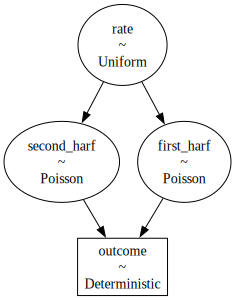

In [4]:
pm.model_to_graphviz(model)

In [6]:
with model:
    trace = pm.sample(draws=10000, tune=1000, chains=4, random_seed=0)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [rate]
>CompoundStep
>>Metropolis: [first_harf]
>>Metropolis: [second_harf]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 21 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
first_harf,1.001,1.008,0.000,3.000,0.012,0.009,6895.0,8356.0,1.0
second_harf,1.013,1.007,0.000,3.000,0.012,0.009,7126.0,8061.0,1.0
rate,1.000,0.115,0.802,1.178,0.001,0.001,14068.0,19750.0,1.0
outcome,2.014,1.440,0.000,4.000,0.018,0.013,6916.0,9679.0,1.0


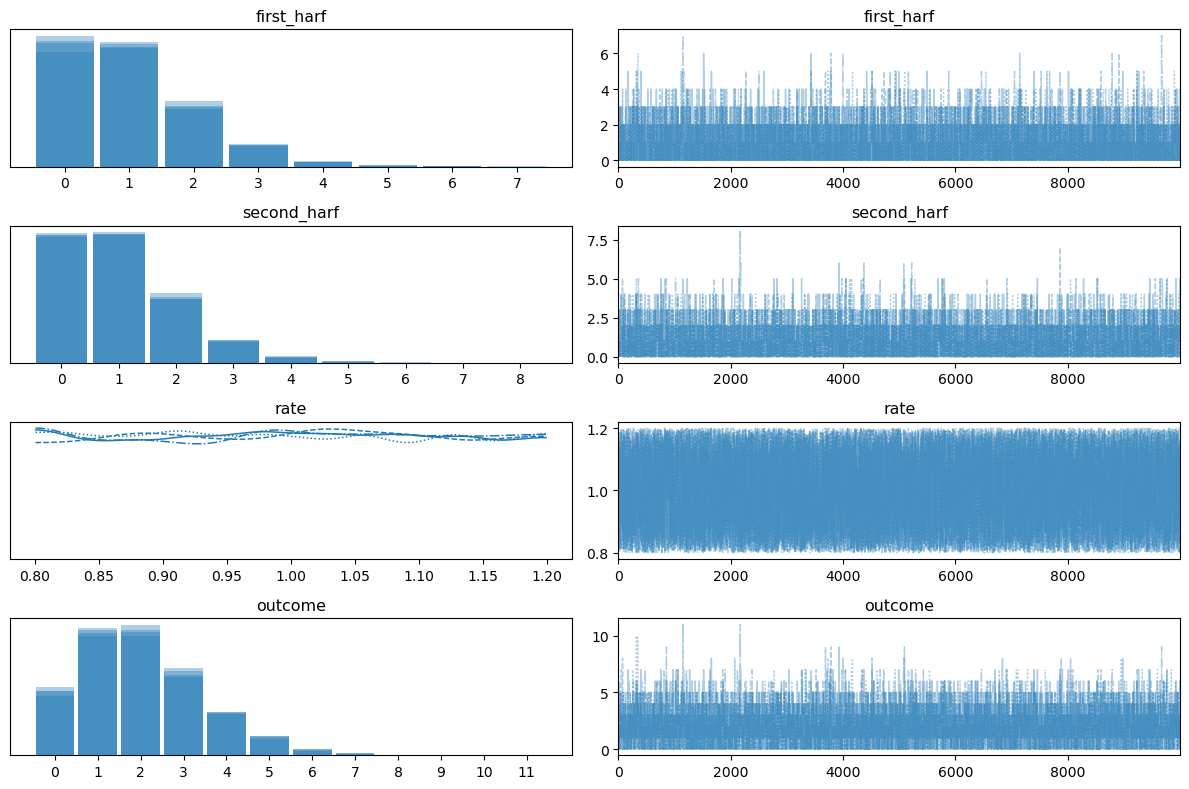

In [7]:
with model:
    display(az.summary(trace))
    az.plot_trace(trace)
    plt.tight_layout()

In [18]:
for i in range(7):
    print(i, (trace['posterior']['outcome'].to_numpy() == i).mean())

0 0.137725
1 0.2668
2 0.2692
3 0.178125
4 0.091525
5 0.0393
6 0.012


In [ ]:
model = pm.Model()

with model:

    rate = pm.Uniform("rate", lower=0.8, upper=1.2)

    first_harf = pm.Poisson("first_harf", mu=rate, observed=0)

    second_harf = pm.Poisson("second_harf", mu=rate)

    outcome = pm.Deterministic("outcome", first_harf + second_harf)